# Exploratory Data Analysis

In [1]:
import pandas as pd
import os

from src.utils import plot_distribution, plot_scaled_variance, plot_mi_scores, get_mi_scores

In [2]:
os.chdir('../')

In [3]:
X = pd.read_excel('data/raw/dataset.xlsx')

In [4]:
X.columns

Index(['Nombre y apellidos', 'Edad', 'Sexo', 'Café', 'Tabaco', 'Alcohol',
       'APPHTA', 'APPDM', 'APPEPOC', 'APPIRC', 'APPEnfValvular', 'APPIMA',
       'APPAngina', 'APPACV', 'No.LesionesCoronarias', 'LesionACD',
       'Lesion TCI', 'LesionADA', 'LesionACircunfleja', 'BCPIAoPrep',
       'BCPIAoTrans', 'BCPIAoPost', 'Dobutamina', 'Dopamina', 'Norepinefrina',
       'Epinefrina', 'Nitroglicerina', 'Hipoglucemia', 'Hiperglucemia',
       'Hiponatremia', 'Hipernatremia ', 'Hipopotasemia', 'Hiperpotasemia',
       'Acidosis metabólica', 'Alcalosis metabólica', 'Acidosis respiratoria',
       'Alcalosis respiratoria', 'DisfRenalPosop', 'DisfNeuroPosop',
       'DisfHepatPosop', 'FI', 'FE', 'Estadia', 'Egreso', 'Evoluciòn',
       'FEVIPreop', 'TamañoVI', 'AltContractVI', 'AMI', 'AMI+VSI', 'DAMI',
       'DAM + VS', 'PuentesAR', 'PuentesAGep', 'PuentesVen',
       'RevascIncompleta', 'CEC', 'DuracionCEC', 'Uso vasoactivos pst',
       'AltMITransop', 'IMAPeriop', 'Vasoplejia post', 'Hip

In [5]:
X.head()

,Nombre y apellidos,Edad,Sexo,Café,Tabaco,Alcohol,APPHTA,APPDM,APPEPOC,APPIRC,...,BalanceHidrPos,BalanceHidrNeg.,BalanceHidrNeutro,Lactato post,APP CI,HTA post,FEVI post,SvO2,SBGC,PA
0,Martina Vìrgen Olivera Guerra,66.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,5.0,0.0,0.0,45.0,56.0,1.0,NaN
1,Reginald Hajarysingh,63.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.3,0.0,0.0,56.0,78.0,0.0,NaN
2,Miguel Mariano Ornia Margolles,67.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,6.3,0.0,0.0,41.0,55.0,1.0,NaN
3,Miriam Rosa Hernández Trocones,67.0,2.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,9.0,0.0,0.0,37.0,41.0,1.0,NaN
4,Tomás Rodríguez Durán,73.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,...,1.0,0.0,0.0,2.0,1.0,0.0,55.0,78.0,0.0,NaN


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 122 entries, 0 to 121
Data columns (total 76 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   Nombre y apellidos      120 non-null    object        
 1   Edad                    120 non-null    float64       
 2   Sexo                    120 non-null    float64       
 3   Café                    120 non-null    float64       
 4   Tabaco                  120 non-null    float64       
 5   Alcohol                 120 non-null    float64       
 6   APPHTA                  120 non-null    float64       
 7   APPDM                   120 non-null    float64       
 8   APPEPOC                 120 non-null    float64       
 9   APPIRC                  120 non-null    float64       
 10  APPEnfValvular          120 non-null    float64       
 11  APPIMA                  120 non-null    float64       
 12  APPAngina               120 non-null    float64   

In [7]:
# Drop rows with problematic values
X.drop([18, 20, 64, 65, 94, 120], inplace=True)

X, y = (X.drop(['Nombre y apellidos', 'PA', 'FI', 'FE', 'SBGC'], axis=1), X['SBGC'])

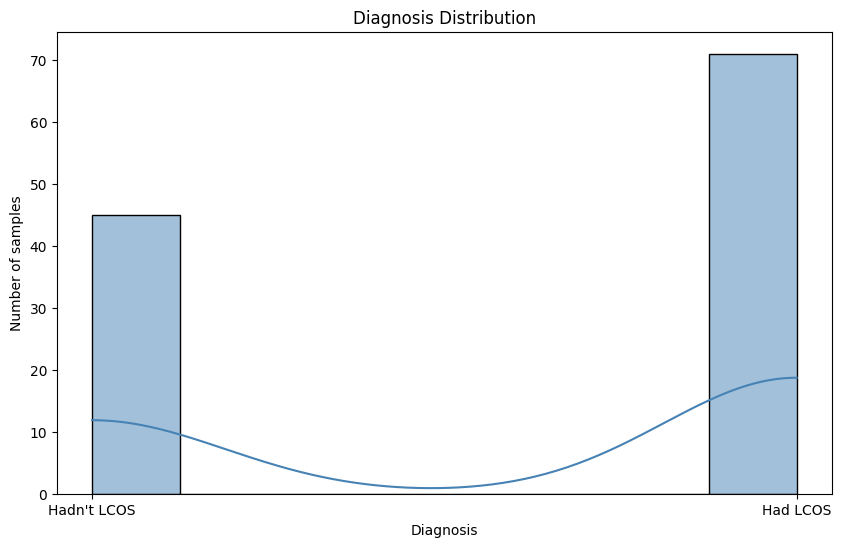

In [8]:
plot_distribution(y, 1)

In [9]:
categorical_features = X.select_dtypes(include=object)
categorical_features.columns

Index(['No.LesionesCoronarias', 'Estadia', 'DuracionCEC'], dtype='object')

In [10]:
X['No.LesionesCoronarias'].unique()

array([3, 4, 5, 7, 2, 'Multiv', 'Multiv ', 1, 'multiv'], dtype=object)

In [11]:
X["No.LesionesCoronarias"] = [7 if i in ('Multiv', 'Multiv ', 'multiv') else i
                              for i in X["No.LesionesCoronarias"]]

X["No.LesionesCoronarias"] = X["No.LesionesCoronarias"].astype(int)

In [12]:
X['Estadia'].unique()

array([3, 6, 7, 2, 4, 1, 14, 12, '6h', 5, 10, 17, 13, 11, 20, 8, 28, 15,
       27, 19, '3horas'], dtype=object)

In [13]:
numerical_rows = pd.to_numeric(X["Estadia"], errors="coerce").notna()
X["Estadia"] = X["Estadia"].astype(str)
X["Estadia"] = X["Estadia"].str.replace("horas", "")
X["Estadia"] = X["Estadia"].str.replace("h", "")
X["Estadia"] = X["Estadia"].astype(int)
X.loc[numerical_rows, "Estadia"] = X.loc[numerical_rows, "Estadia"] * 24

In [14]:
X['DuracionCEC'].unique()

array(["130'", "120'", "142'", "101'", "134'", "145'", "152'", "109'",
       "169'", "171'", "137'", "214'", "147'", "165'", "179'", "82'",
       "103'", "124'", "88'", "172'", "200'", "140'", "79'", 140, "143'",
       "321'", 48, "220'", "262'", "141'", "5'", "65'", "271'", "163'",
       "138'", "80'", "155'", 0, "108'", "146'", "94'", "47'", "161'",
       "166'", "139'", "133'", "135'", "132'", "129'", "42'", "188'",
       "70'", "181'", "92'", "102'", "118'", "159'", "154'", "125'",
       "225'", "91'", "90'", "107'", "115'", "160'", "117'", "84'", "96'",
       "76'", "66'", "150'", "198'", "100'", "55'", "144'", "158'",
       "700'", 245, 205, "190'", "85'", "37'"], dtype=object)

In [15]:
X["DuracionCEC"] = X["DuracionCEC"].astype(str)
X["DuracionCEC"] = X["DuracionCEC"].str.replace("'", "")
X["DuracionCEC"] = X["DuracionCEC"].astype(int)

X['DuracionCEC'].dtypes

dtype('int32')

In [16]:
X['FEVI post'] = X['FEVI post'].apply(lambda x: x/100 if x > 1 else x)

In [17]:
X['SvO2'] = X['SvO2'].apply(lambda x: x/100 if x > 1 else x)

In [18]:
X = X.apply(lambda x: x.fillna(x.mode()[0]) if x.isnull().any() else x)

X.isnull().sum()

Edad            0
Sexo            0
Café            0
Tabaco          0
Alcohol         0
               ..
Lactato post    0
APP CI          0
HTA post        0
FEVI post       0
SvO2            0
Length: 71, dtype: int64

In [19]:
variance = X.var()
variance

Edad            55.546852
Sexo             0.119940
Café             0.219115
Tabaco           0.247376
Alcohol          0.093553
                  ...    
Lactato post    21.997490
APP CI           0.205322
HTA post         0.113568
FEVI post        0.012003
SvO2             0.023345
Length: 71, dtype: float64

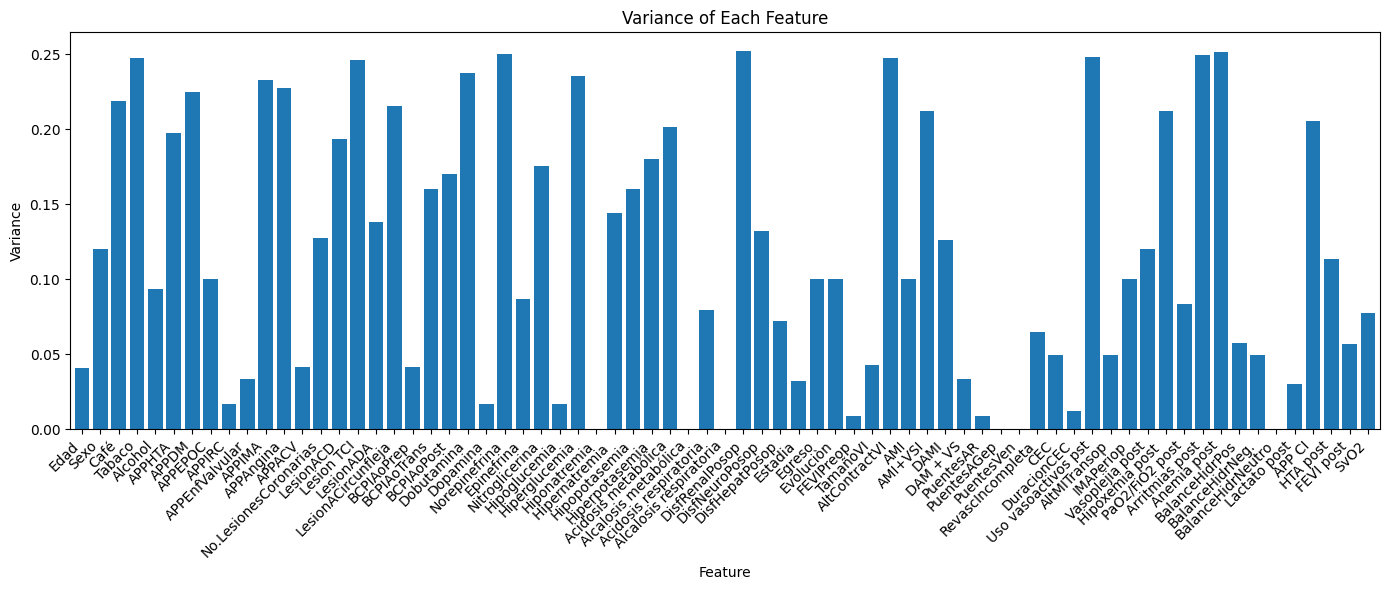

In [20]:
plot_scaled_variance(X, 1)

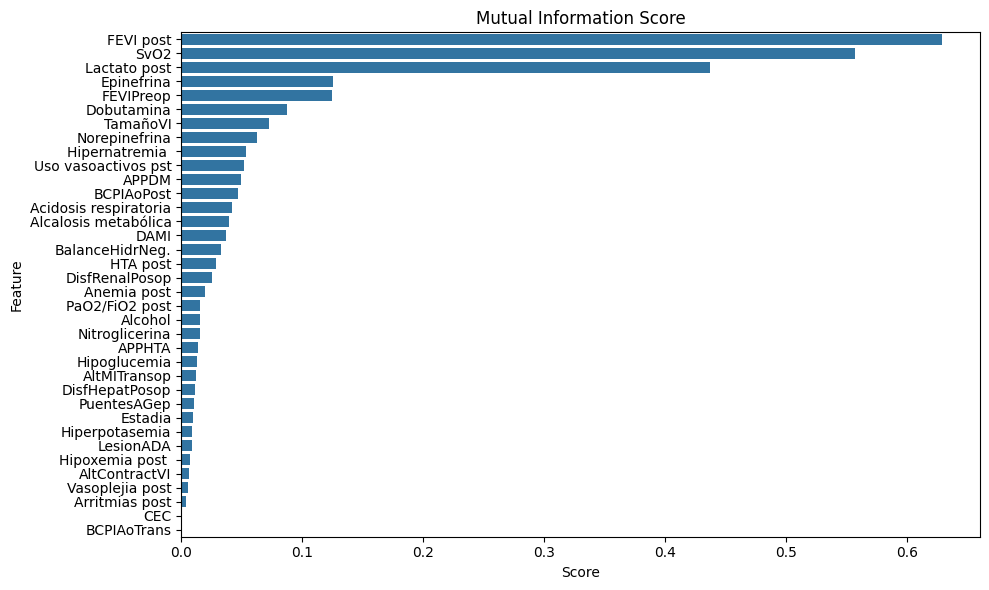

In [21]:
plot_mi_scores(get_mi_scores(X, y), 1)

In [22]:
X.columns

Index(['Edad', 'Sexo', 'Café', 'Tabaco', 'Alcohol', 'APPHTA', 'APPDM',
       'APPEPOC', 'APPIRC', 'APPEnfValvular', 'APPIMA', 'APPAngina', 'APPACV',
       'No.LesionesCoronarias', 'LesionACD', 'Lesion TCI', 'LesionADA',
       'LesionACircunfleja', 'BCPIAoPrep', 'BCPIAoTrans', 'BCPIAoPost',
       'Dobutamina', 'Dopamina', 'Norepinefrina', 'Epinefrina',
       'Nitroglicerina', 'Hipoglucemia', 'Hiperglucemia', 'Hiponatremia',
       'Hipernatremia ', 'Hipopotasemia', 'Hiperpotasemia',
       'Acidosis metabólica', 'Alcalosis metabólica', 'Acidosis respiratoria',
       'Alcalosis respiratoria', 'DisfRenalPosop', 'DisfNeuroPosop',
       'DisfHepatPosop', 'Estadia', 'Egreso', 'Evoluciòn', 'FEVIPreop',
       'TamañoVI', 'AltContractVI', 'AMI', 'AMI+VSI', 'DAMI', 'DAM + VS',
       'PuentesAR', 'PuentesAGep', 'PuentesVen', 'RevascIncompleta', 'CEC',
       'DuracionCEC', 'Uso vasoactivos pst', 'AltMITransop', 'IMAPeriop',
       'Vasoplejia post', 'Hipoxemia post ', 'PaO2/FiO2 post',
 

In [24]:
data = X.join(y)
data.to_csv('data/processed/dataset.csv', index=False)